<a href="https://colab.research.google.com/github/Albieri-Ray/Albieri_DML/blob/main/Albieri_Entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación y Configuración

In [157]:
# Importando librerías

import numpy as np
import pandas as pd

# Scikit-Learn 
import sklearn

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

### Importando Datos

In [158]:
# leer la data desde una archivo csv
BCCP = pd.read_csv('Bank Customer Churn Prediction.csv')

In [159]:
# Visualizar parte de la tabla
BCCP.head(8)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


### Analizando Datos 

In [160]:
BCCP.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

<Axes: xlabel='churn', ylabel='count'>

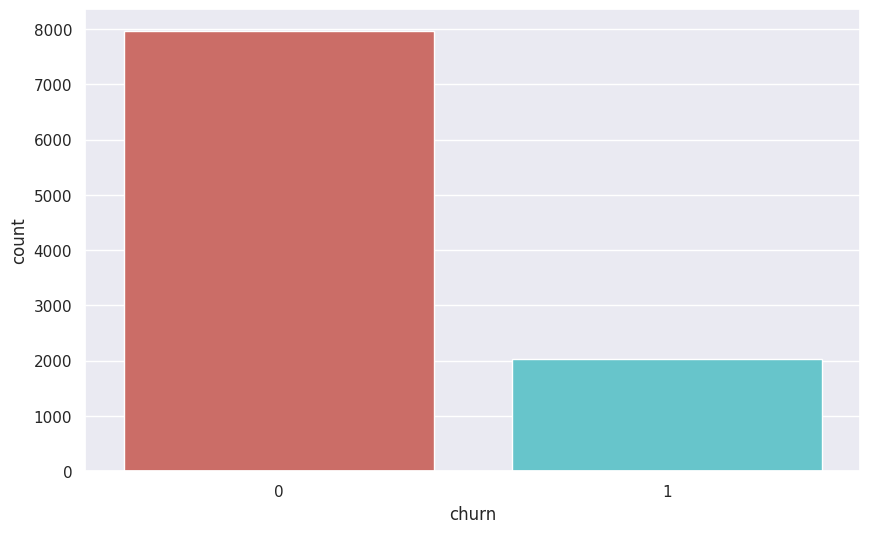

In [161]:
# Analizando el target 
sns.countplot(x='churn', data = BCCP, palette = 'hls')

In [162]:
BCCP.groupby(['tenure']).agg({"customer_id":"count",
                              "credit_score":"mean",
                              "age":"mean"})

,customer_id,credit_score,age
tenure,,,
0,413,652.043584,39.186441
1,1035,648.806763,39.428986
2,1048,652.832061,39.058206
3,1009,650.530228,39.028741
4,989,651.502528,38.239636
5,1012,650.527668,39.287549
6,967,647.380558,38.862461
7,1028,649.606031,38.367704
8,1025,647.749268,38.450732


In [163]:
BCCP.age.mean()

38.9218

In [164]:
print(f'Edad minima: {BCCP.age.min()}')
print(f'Edad maximo: {BCCP.age.max()}')

Edad minima: 18
Edad maximo: 92


<Axes: xlabel='gender', ylabel='count'>

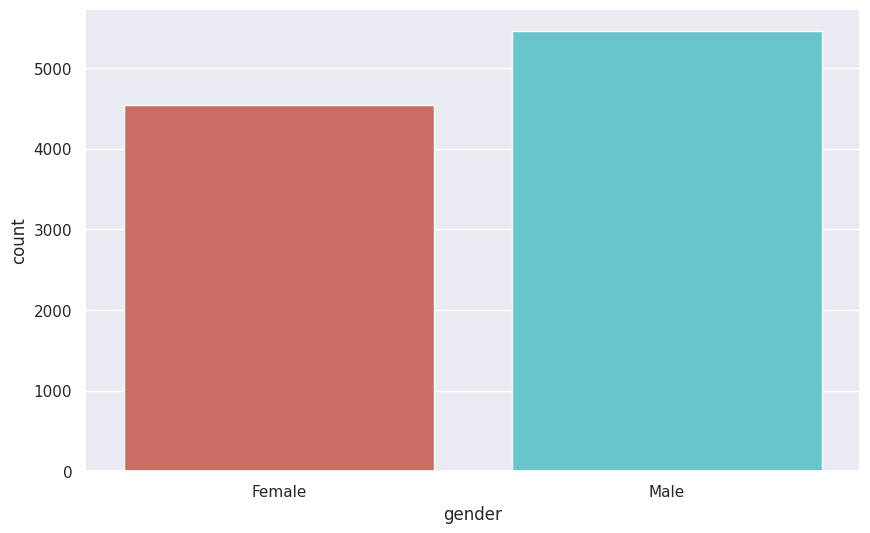

In [165]:
sns.countplot(x='gender', data = BCCP, palette = 'hls')

<Axes: xlabel='gender', ylabel='churn'>

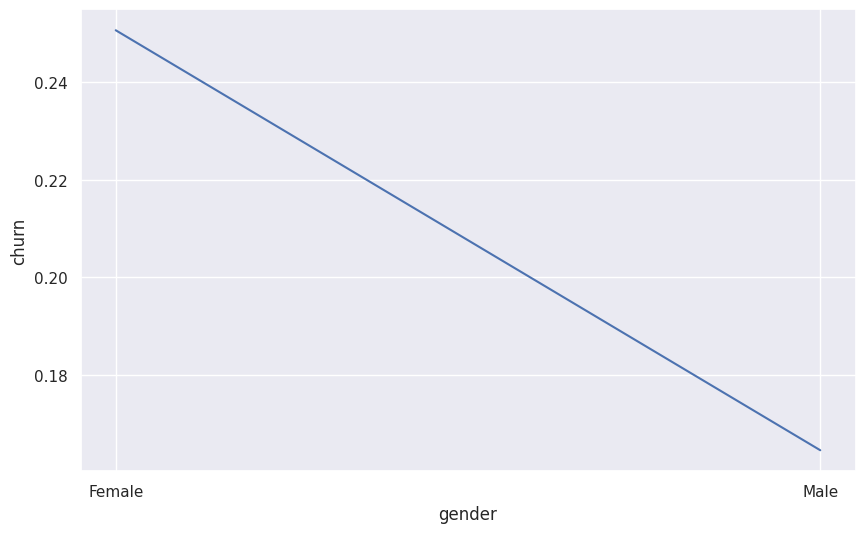

In [166]:
temp_1 = BCCP.groupby(['gender']).agg({"customer_id":"count",
                           "churn" :"mean"}).reset_index()

sns.lineplot(x = 'gender', y = 'churn', data = temp_1)

In [167]:
temp_1

,gender,customer_id,churn
0,Female,4543,0.250715
1,Male,5457,0.164559


<Axes: xlabel='edad_cat', ylabel='churn'>

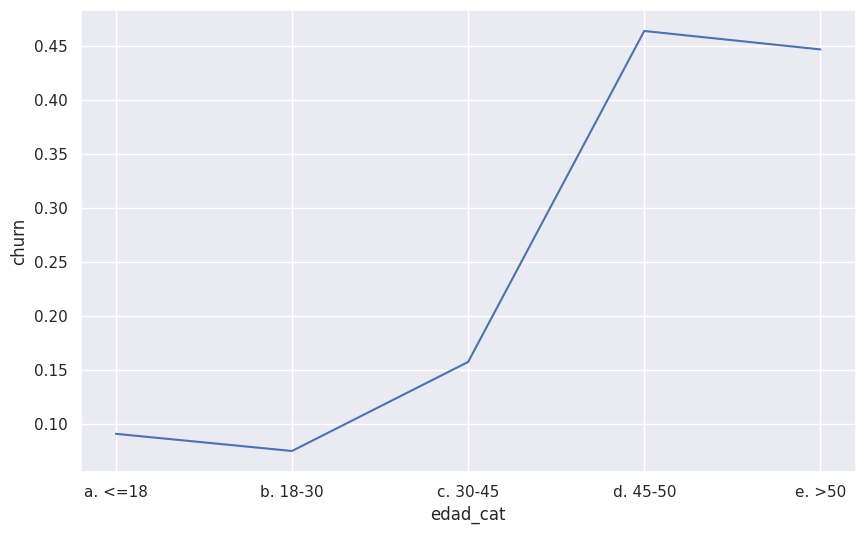

In [168]:
from math import isnan

def catedad(x):
  if isnan(x):
    return 'missing'
  elif x <= 18:
    return 'a. <=18'
  elif x <= 30:
    return 'b. 18-30'
  elif x <= 45:
    return 'c. 30-45'
  elif x <= 50:
    return 'd. 45-50'
  else:
    return 'e. >50'

temp_2 = BCCP.copy()
temp_2 = temp_2.dropna()
temp_2['edad_cat'] = BCCP.age.apply(lambda x: catedad(x))

sns.lineplot(x = 'edad_cat', y = 'churn', 
             data = temp_2.groupby(['edad_cat']).agg({"customer_id":"count", 
                                                      "churn" :"mean"}).reset_index())


In [169]:
# Verificar si existen valores especiales
variable = BCCP.gender
for v in variable:
  if v.count('@') > 0:
    print(v)
  elif v.count('#') > 0:
    print(v)
  elif v.count('&') > 0:
    print(v)
  elif v.count('$') > 0:
    print(v)
  elif v == 'x':
    print(v)
  elif v == 'XNA':
    print(v)
  elif v == '#VALUE!':
    print(v)

In [170]:
# Verificar si existen valores especiales
for variable in BCCP.columns.tolist():
  for v in variable:
    if v.count('@') > 0:
      print(v)
    elif v.count('#') > 0:
      print(v)
    elif v.count('&') > 0:
      print(v)
    elif v.count('$') > 0:
      print(v)
    elif v == 'x':
      print(v)
    elif v == 'XNA':
      print(v)
    elif v == '#VALUE!':
      print(v)

<ipython-input-171-10026476e79e>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(temp_2['age_cat'], palette = 'hls', discrete=True)


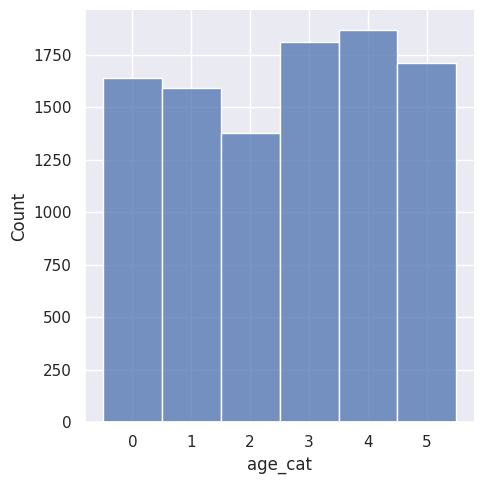

In [171]:
# Discretizar variable con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

temp_2['age_cat'] = KBinsDiscretizer(n_bins = 6, 
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(temp_2[['age']].fillna(temp_2[['age']].mean()))
  
sns.displot(temp_2['age_cat'], palette = 'hls', discrete=True)

<ipython-input-172-fadb16d61296>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='age_rango', ylabel='churn'>

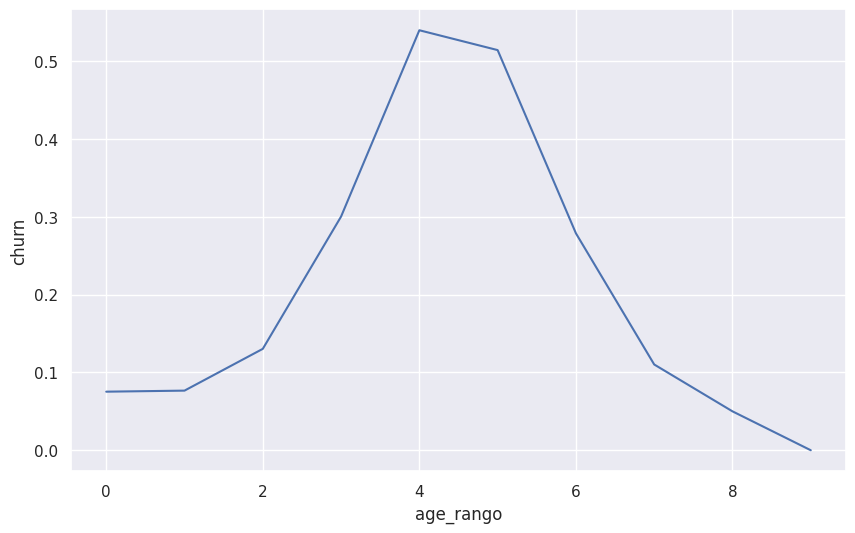

In [172]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'age'
temp = BCCP.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'churn': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'churn')

### Muestreo Train/Test

In [173]:
# Muestreo de BCCP
import sklearn

from sklearn.model_selection import train_test_split

train, test = train_test_split(BCCP,
                               stratify = BCCP['churn'],
                               train_size = 0.7,
                               random_state=273
                               )

### Tratamiento de variables categoricas

In [174]:
categorical_features = ['gender',
                        'country', 
                        'credit_card',
                        'active_member'
                       ]

numerical_features = list(set(BCCP.columns.tolist()) - set(categorical_features + ['customer_id', 'churn']))    

In [175]:
numerical_features

['age',
 'estimated_salary',
 'products_number',
 'tenure',
 'balance',
 'credit_score']

In [176]:
# Tratamiento de variables categóricas

In [177]:
BCCP[categorical_features].fillna('missing', inplace = True)

<ipython-input-177-62d82817cfba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BCCP[categorical_features].fillna('missing', inplace = True)


In [178]:
BCCP[categorical_features].drop_duplicates().head(15)

,gender,country,credit_card,active_member
0,Female,France,1,1
1,Female,Spain,0,1
2,Female,France,1,0
3,Female,France,0,0
4,Female,Spain,1,1
5,Male,Spain,1,0
6,Male,France,1,1
7,Female,Germany,1,0
8,Male,France,0,1
10,Male,France,0,0


In [179]:
# Reemplazar las filas NaN por missings 
for cf in categorical_features:
  BCCP[cf] = BCCP[cf].replace(np.nan,'missing')

BCCP[categorical_features].drop_duplicates().head()


,gender,country,credit_card,active_member
0,Female,France,1,1
1,Female,Spain,0,1
2,Female,France,1,0
3,Female,France,0,0
4,Female,Spain,1,1


In [180]:
train[categorical_features].dtypes

gender           object
country          object
credit_card       int64
active_member     int64
dtype: object

In [181]:
train[categorical_features] = train[categorical_features].astype('category')
test[categorical_features] = test[categorical_features].astype('category')

### Target Encoding

In [182]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
from category_encoders import TargetEncoder
encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[categorical_features].astype('category'), train['churn'])

TargetEncoder(cols=['gender', 'country', 'credit_card', 'active_member'],
              handle_unknown='infrequent_if_exist')

In [184]:
train[[x + '_coded' for x in categorical_features]] = encoder.transform(train[categorical_features].astype('category'))
test[[x + '_coded' for x in categorical_features]] = encoder.transform(test[categorical_features].astype('category'))


In [185]:
train[['gender','gender_coded']].drop_duplicates()

,gender,gender_coded
9896,Female,0.251409
2085,Male,0.163689


In [186]:
# Almaceno mis campos coded de mis variables categoricas
categ_var_coded = [x + '_coded' for x in categorical_features]

### Análisis Univariado

In [187]:
# Creando métricas de las variables

univariate = train[numerical_features + categ_var_coded].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '5%': 'P5',
                             '50%': 'median',
                             '95%': 'P95'
                             }, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/train.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [188]:
univariate

,feature,count,mean,std,min,P5,median,P95,max,missing_rate
0,age,7000.0,38.860429,10.419372,18.000000,25.000000,37.000000,60.000000,92.000000,0.0
1,estimated_salary,7000.0,100459.740443,57531.309315,11.580000,9851.818500,100600.355000,190661.029000,199992.480000,0.0
2,products_number,7000.0,1.530429,0.582097,1.000000,1.000000,1.000000,2.000000,4.000000,0.0
3,tenure,7000.0,5.017571,2.885312,0.000000,1.000000,5.000000,9.000000,10.000000,0.0
4,balance,7000.0,76880.110710,62521.881602,0.000000,0.000000,97600.360000,163757.248000,238387.560000,0.0
5,credit_score,7000.0,650.671000,96.385428,350.000000,489.000000,651.000000,813.000000,850.000000,0.0
6,gender_coded,7000.0,0.203714,0.043695,0.163689,0.163689,0.163689,0.251409,0.251409,0.0
7,country_coded,7000.0,0.203714,0.069319,0.163003,0.163003,0.163003,0.323129,0.323129,0.0
8,credit_card_coded,7000.0,0.203714,0.003284,0.201555,0.201555,0.201555,0.208708,0.208708,0.0
9,active_member_coded,7000.0,0.203714,0.059226,0.145582,0.145582,0.145582,0.264047,0.264047,0.0


### Tratamiento de variables numéricas (outliers por percentiles)

In [189]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.P5.values[0]
  upper_limit = desc.P95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  
  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [190]:
univariate.head()

,feature,count,mean,std,min,P5,median,P95,max,missing_rate
0,age,7000.0,38.860429,10.419372,18.00,25.0000,37.000,60.000,92.00,0.0
1,estimated_salary,7000.0,100459.740443,57531.309315,11.58,9851.8185,100600.355,190661.029,199992.48,0.0
2,products_number,7000.0,1.530429,0.582097,1.00,1.0000,1.000,2.000,4.00,0.0
3,tenure,7000.0,5.017571,2.885312,0.00,1.0000,5.000,9.000,10.00,0.0
4,balance,7000.0,76880.110710,62521.881602,0.00,0.0000,97600.360,163757.248,238387.56,0.0


### Tratamiento de missings

In [191]:
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-191-b1ef414424de>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-191-b1ef414424de>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


### Pre-selección de variables

In [192]:
### Desarrollando el Gini y su valor absoluto
from sklearn.metrics import *

dfgini = pd.DataFrame({'feature': numerical_features + categ_var_coded,
                       'gini': [roc_auc_score(train.churn, train[col])*2-1 for col in numerical_features + categ_var_coded]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
0,age,0.463794,0.463794
7,country_coded,0.186619,0.186619
9,active_member_coded,0.182511,0.182511
4,balance,0.157721,0.157721
2,products_number,-0.145514,0.145514
6,gender_coded,0.134158,0.134158
5,credit_score,-0.030138,0.030138
1,estimated_salary,0.022464,0.022464
3,tenure,-0.018237,0.018237
8,credit_card_coded,0.009293,0.009293


In [193]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

,feature,count,mean,std,min,P5,median,P95,max,missing_rate,gini,gini_abs
0,age,7000.0,38.860429,10.419372,18.000000,25.000000,37.000000,60.000000,92.000000,0.0,0.463794,0.463794
7,country_coded,7000.0,0.203714,0.069319,0.163003,0.163003,0.163003,0.323129,0.323129,0.0,0.186619,0.186619
9,active_member_coded,7000.0,0.203714,0.059226,0.145582,0.145582,0.145582,0.264047,0.264047,0.0,0.182511,0.182511
4,balance,7000.0,76880.110710,62521.881602,0.000000,0.000000,97600.360000,163757.248000,238387.560000,0.0,0.157721,0.157721
2,products_number,7000.0,1.530429,0.582097,1.000000,1.000000,1.000000,2.000000,4.000000,0.0,-0.145514,0.145514
6,gender_coded,7000.0,0.203714,0.043695,0.163689,0.163689,0.163689,0.251409,0.251409,0.0,0.134158,0.134158
5,credit_score,7000.0,650.671000,96.385428,350.000000,489.000000,651.000000,813.000000,850.000000,0.0,-0.030138,0.030138
1,estimated_salary,7000.0,100459.740443,57531.309315,11.580000,9851.818500,100600.355000,190661.029000,199992.480000,0.0,0.022464,0.022464
3,tenure,7000.0,5.017571,2.885312,0.000000,1.000000,5.000000,9.000000,10.000000,0.0,-0.018237,0.018237
8,credit_card_coded,7000.0,0.203714,0.003284,0.201555,0.201555,0.201555,0.208708,0.208708,0.0,0.009293,0.009293


In [194]:
univariate_II.head(15)

,feature,count,mean,std,min,P5,median,P95,max,missing_rate,gini,gini_abs
0,age,7000.0,38.860429,10.419372,18.000000,25.000000,37.000000,60.000000,92.000000,0.0,0.463794,0.463794
1,estimated_salary,7000.0,100459.740443,57531.309315,11.580000,9851.818500,100600.355000,190661.029000,199992.480000,0.0,0.022464,0.022464
2,products_number,7000.0,1.530429,0.582097,1.000000,1.000000,1.000000,2.000000,4.000000,0.0,-0.145514,0.145514
3,tenure,7000.0,5.017571,2.885312,0.000000,1.000000,5.000000,9.000000,10.000000,0.0,-0.018237,0.018237
4,balance,7000.0,76880.110710,62521.881602,0.000000,0.000000,97600.360000,163757.248000,238387.560000,0.0,0.157721,0.157721
5,credit_score,7000.0,650.671000,96.385428,350.000000,489.000000,651.000000,813.000000,850.000000,0.0,-0.030138,0.030138
6,gender_coded,7000.0,0.203714,0.043695,0.163689,0.163689,0.163689,0.251409,0.251409,0.0,0.134158,0.134158
7,country_coded,7000.0,0.203714,0.069319,0.163003,0.163003,0.163003,0.323129,0.323129,0.0,0.186619,0.186619
8,credit_card_coded,7000.0,0.203714,0.003284,0.201555,0.201555,0.201555,0.208708,0.208708,0.0,0.009293,0.009293
9,active_member_coded,7000.0,0.203714,0.059226,0.145582,0.145582,0.145582,0.264047,0.264047,0.0,0.182511,0.182511


In [220]:
# Difiniendo los criterios para seleccionar variables

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.00) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 10
selected features: 6


In [221]:
### Estandarización

train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - train[final_features].mean())/train[final_features].std()

In [222]:
final_features

['age',
 'estimated_salary',
 'products_number',
 'tenure',
 'balance',
 'credit_score',
 'gender_coded',
 'country_coded',
 'credit_card_coded',
 'active_member_coded']

### Regresión Logística

In [223]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.churn, sm.add_constant(train[[x + '_std' for x in final_features]]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.430264
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.1488
Time:                        02:51:20   Log-Likelihood:                -3011.9
converged:                       True   LL-Null:                       -3538.6
Covariance Type:            nonrobust   LLR p-value:                5.785e-220
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.6446      0.037    -44.784      0.000      -1.717   

In [224]:
features = [x + '_std' for x in final_features]
features.remove('products_number_std')

mod = sm.Logit(train.churn, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.430358
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6990
Method:                           MLE   Df Model:                            9
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.1487
Time:                        02:51:22   Log-Likelihood:                -3012.5
converged:                       True   LL-Null:                       -3538.6
Covariance Type:            nonrobust   LLR p-value:                9.957e-221
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.6442      0.037    -44.784      0.000      -1.716   

In [200]:
BCCP.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

### Performance

In [225]:
# Usando el modelo para predecir
train_II = train.copy()
test_II  = test.copy()

train_II['probability'] = res.predict(sm.add_constant(train[features]))
test_II['probability']  = res.predict(sm.add_constant(test[features]))


In [226]:
# AUC
print('TRAIN AUC: %f' %(roc_auc_score(train.churn, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(test.churn, test_II.probability)))


TRAIN AUC: 0.765701
TEST AUC: 0.775128


In [227]:
# GINI
print('TRAIN GINI: %f' %(roc_auc_score(train.churn, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(test.churn, test_II.probability)*2-1))


TRAIN GINI: 0.531402
TEST GINI: 0.550256


In [204]:
test_II

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,...,country_coded_t,credit_card_coded_t,active_member_coded_t,age_std,products_number_std,balance_std,gender_coded_std,country_coded_std,active_member_coded_std,probability
1857,15709338,544,France,Female,29,1,118560.55,1,1,1,...,0.163003,0.201555,0.145582,-0.946355,-0.911238,0.666654,1.091531,-0.587298,-0.981528,0.067793
881,15571928,679,France,Female,43,4,0.00,3,1,0,...,0.163003,0.201555,0.264047,0.397296,2.524617,-1.229651,1.091531,-0.587298,1.018674,0.277128
3336,15671390,690,Spain,Male,36,10,0.00,2,1,0,...,0.164455,0.201555,0.264047,-0.274530,0.806689,-1.229651,-0.916014,-0.566357,1.018674,0.119564
7962,15623630,634,Germany,Female,56,3,116251.24,1,0,1,...,0.323129,0.208708,0.145582,1.644972,-0.911238,0.629718,1.091531,1.722677,-0.981528,0.517814
8355,15695301,504,Spain,Male,44,4,113522.64,1,1,1,...,0.164455,0.201555,0.145582,0.493271,-0.911238,0.586075,-0.916014,-0.566357,-0.981528,0.111476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,15647890,691,France,Male,37,9,149405.18,1,1,1,...,0.163003,0.201555,0.145582,-0.178555,-0.911238,1.159995,-0.916014,-0.587298,-0.981528,0.077129
8911,15781914,718,Germany,Male,32,9,169947.41,2,1,1,...,0.323129,0.201555,0.145582,-0.658430,0.806689,1.488556,-0.916014,1.722677,-0.981528,0.114536
5367,15742848,673,France,Male,41,5,0.00,1,1,1,...,0.163003,0.201555,0.145582,0.205346,-0.911238,-1.229651,-0.916014,-0.587298,-0.981528,0.066275
5411,15813640,642,France,Female,40,7,0.00,2,1,0,...,0.163003,0.201555,0.264047,0.109370,0.806689,-1.229651,1.091531,-0.587298,1.018674,0.235642


In [228]:
train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# Tablas cruzadas

pd.crosstab(test_II.prediction, test_II.churn, margins=True, margins_name="Total")

churn,0,1,Total
prediction,,,
0,2297,476,2773
1,92,135,227
Total,2389,611,3000


In [229]:
pd.crosstab(test_II.prediction, test_II.churn, margins=True, margins_name="Total", normalize=True)

churn,0,1,Total
prediction,,,
0,0.765667,0.158667,0.924333
1,0.030667,0.045000,0.075667
Total,0.796333,0.203667,1.000000


In [230]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(train_II.churn, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(test_II.churn, test_II.prediction)))


TRAIN ACCURACY: 0.810571
TEST ACCURACY: 0.810667


In [231]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(train_II.churn, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(test_II.churn, test_II.prediction)))


TRAIN PRECISION: 0.602881
TEST PRECISION: 0.594714


In [232]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(train_II.churn, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(test_II.churn, test_II.prediction)))


TRAIN RECALL: 0.205470
TEST RECALL: 0.220949


In [233]:
# F1

print('TRAIN F1: %f' %(f1_score(train_II.churn, train_II.prediction)))
print('TEST F1: %f' %(f1_score(test_II.churn, test_II.prediction)))


TRAIN F1: 0.306485
TEST F1: 0.322196
